<a href="https://colab.research.google.com/github/Alecia113/2021-S2/blob/main/LR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Input dataset**

In [ ]:
#https://blog.csdn.net/weixin_38029956/article/details/116566430

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1KWsveT8bIxrW0UIGa8AdPZ2AzPO6FYUN'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Total_data.csv')  

#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv("Total_data.csv")
df  

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 删 ID

In [ ]:
df.drop(['id'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df.describe()  #int64和float64进行统计

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#查看缺失值
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#df['bmi']

In [ ]:
# Mean = df['bmi'].mean(axis=0)
# print(Mean)

In [ ]:
Mean = df['bmi'].mean(axis=0)
#print(Mean)
df['bmi'].fillna(Mean,inplace=True)


In [ ]:
#填充缺失值
df['bmi'].fillna(df['bmi'].mean,inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

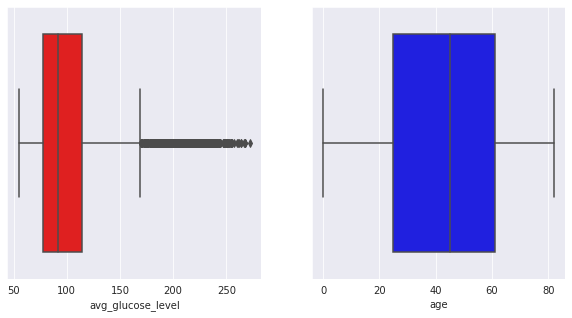

In [ ]:
import matplotlib.pyplot as plt
##箱型可视化
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(x='avg_glucose_level',data=df,color='red')  ##平均血糖水平

plt.subplot(122)
sns.boxplot(x='age',data=df,color='blue')  ##bmi体重指数
plt.show()

In [ ]:
# #箱型可视化
# #平均血糖水平
# sns.boxplot(x='avg_glucose_level',data=df,color='red')
# #bmi体重指数
# sns.boxplot(x='age',data=df,color='blue')

Text(0.5, 1.0, 'Stroke / Ever-Married')

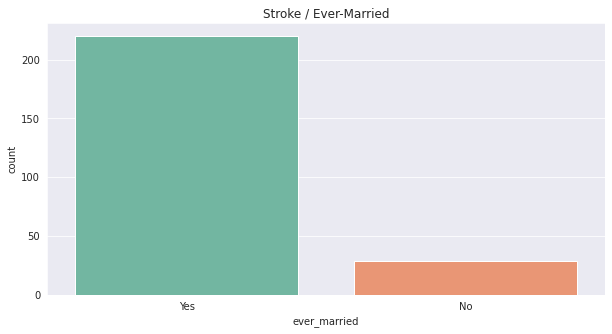

In [ ]:
#已婚人士中风的人数明显高于单身人士
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='ever_married', palette="Set2")
plt.title("Stroke / Ever-Married")

Text(0.5, 1.0, 'Stroke / Work Type')

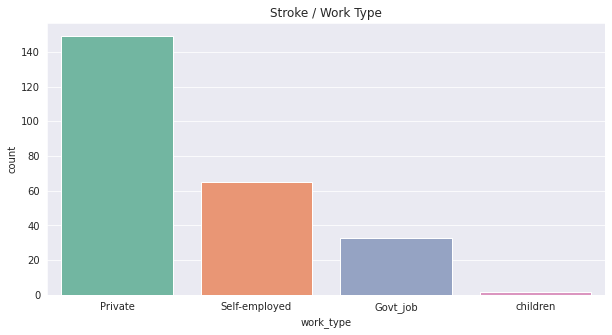

In [ ]:
#私人营业的中风明显高于其他
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='work_type', palette="Set2")
plt.title("Stroke / Work Type")


Text(0.5, 1.0, 'Stroke / Smoking Status')

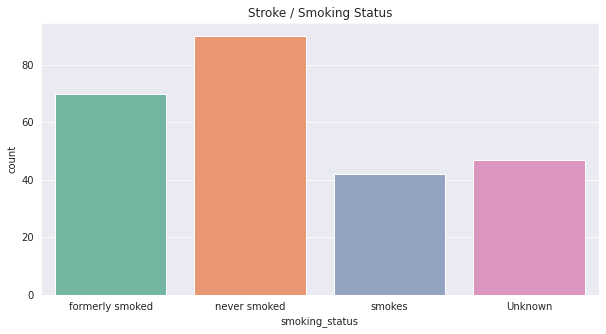

In [ ]:
#过去抽烟者和现在抽烟者中间，从不抽烟的中锋明显严重，看来中不中风跟抽烟没关系
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='smoking_status', palette="Set2")
plt.title("Stroke / Smoking Status")


Text(0.5, 1.0, 'Stroke / Hypertension')

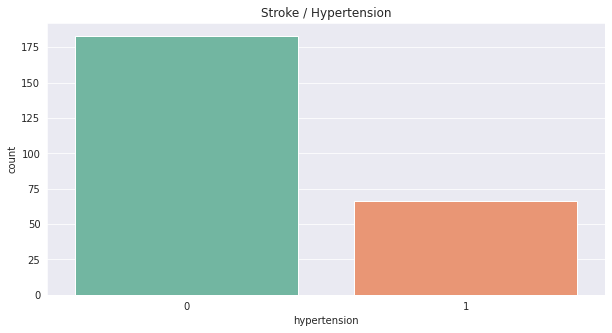

In [ ]:
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='hypertension', palette="Set2")
plt.title("Stroke / Hypertension")
#没有高血压的中风却比有高血压的高，不科学嘛


## 8.种类转换为数字 
**把object里的几个种类转换为数字**

In [ ]:
residence_mapping = {'Urban': 0, 'Rural': 1}
df['Residence_type'] = df['Residence_type'].map(residence_mapping)

marriage_mapping = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].map(marriage_mapping)
df.info()
# #   bmi                5110 non-null   object 
# bmi_mapping = {'No': 0, 'Yes': 1}
# df[' bmi '] = df[' bmi '].map(bmi_mapping)
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 439.3+ KB


In [ ]:
# df['bmi'].fillna(df['bmi'].mean,inplace=True)   #用于填补缺失的BMI，使用平均BMI 28.6
# df.isnull().sum()
# # df.['bmi'].fillna

In [ ]:
# df['bmi']

In [ ]:
#用unique()来查看多少个种类
df['gender'].unique()
df['smoking_status'].unique()
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
#onehotencoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
 #使用0到n_classes-1之间的值对目标标签进行编码/将分类特征编码为一键式数字数组
ohe=OneHotEncoder()
df['gender'] = pd.Categorical(df['gender'])
dfdummies_gender=pd.get_dummies(df['gender'],prefix='gender_encoded')

df['smoking_status']=pd.Categorical(df['smoking_status'])
dfmumies_smoking_status=pd.get_dummies(df['smoking_status'],prefix='smoking_status_encode')

df['work_type'] = pd.Categorical(df['work_type'])
dfDummies_work_type = pd.get_dummies(df['work_type'], prefix = 'work_type_encoded')

#删除三个列
df.drop(['gender'], axis=1, inplace=True)
df.drop(["work_type"], axis=1, inplace=True)
df.drop(["smoking_status"], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   int64  
 4   Residence_type     5110 non-null   int64  
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                5110 non-null   float64
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 319.5 KB


In [ ]:
#新的列加入(编码好的列加入)
df=pd.concat([df,dfdummies_gender],axis=1)
df=pd.concat([df,dfDummies_work_type],axis=1)
df=pd.concat([df,dfmumies_smoking_status],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    5110 non-null   float64
 1   hypertension                           5110 non-null   int64  
 2   heart_disease                          5110 non-null   int64  
 3   ever_married                           5110 non-null   int64  
 4   Residence_type                         5110 non-null   int64  
 5   avg_glucose_level                      5110 non-null   float64
 6   bmi                                    5110 non-null   float64
 7   stroke                                 5110 non-null   int64  
 8   gender_encoded_Female                  5110 non-null   uint8  
 9   gender_encoded_Male                    5110 non-null   uint8  
 10  gender_encoded_Other                   5110 non-null   uint8  
 11  work

## 导入sklearn库的几个分类算法

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  #通过去除均值并缩放到单位方差来标准化特征
from sklearn.linear_model import LogisticRegression  #Logistic回归（又名logit，MaxEnt）分类器。
from sklearn.metrics import confusion_matrix,accuracy_score  #计算混淆矩阵以评估分类的准确性。
from sklearn.metrics import classification_report  #建立一个显示主要分类指标的文本报告。

#准备机器学习模型
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)

#删除三个列'avg_glucose_level','bmi','age'
df=df.drop(columns=columns,axis=1)
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df



,hypertension,heart_disease,ever_married,Residence_type,stroke,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encode_Unknown,smoking_status_encode_formerly smoked,smoking_status_encode_never smoked,smoking_status_encode_smokes,avg_glucose_level,bmi,age
0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,2.706375,1.001234e+00,1.051434
1,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,2.121559,1.384666e-15,0.786070
2,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,-0.005028,4.685773e-01,1.626390
3,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1.437358,7.154182e-01,0.255342
4,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1.501184,-6.357112e-01,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.494658,1.384666e-15,1.626390
5106,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.420775,1.442949e+00,1.670617
5107,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,-0.511443,2.217363e-01,-0.363842
5108,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1.328257,-4.278451e-01,0.343796


In [ ]:
#将stroke作为目标
#然后把strole从表里去掉，然后划分为80%作为训练集，20%作为测试
y=df['stroke']
x=df.drop(['stroke'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')


Total # of sample in whole dataset: 5110
Total # of sample in train dataset: 4088
Total # of sample in test dataset: 1022


In [ ]:
#逻辑回归模型
model_lgr='Logistic Regression'
lr=LogisticRegression()
model_lr=lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
#混淆阵
lr_conf_matrix=confusion_matrix(y_test,lr_pred)
#准确率：
lr_acc=accuracy_score(y_test,lr_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_pred))


confussion matrix
[[976   0]
 [ 46   0]]
-------------------------------------------
Accuracy of Logistic Regression: 95.49902152641879 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       976
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022

